A powerplant engine( gas-turbine) is mainly used to generate electricity. Since the engine can different types of fuels, the engine can have different levels of CO2 and NO emission gases.This dataset is generated from a gas turbine in Turkey.

Column name descriptions:
Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv('gt_full.csv',index_col=0)
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
1,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
2,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
3,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
4,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
5,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [10]:
df.shape

(36733, 11)

In [2]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36733 entries, 1 to 36733
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.4 MB


In [4]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

Skewness:
 AT     -0.043547
AP      0.194121
AH     -0.628034
AFDP    0.381097
GTEP    0.329021
TIT    -0.888278
TAT    -1.755907
TEY     0.116555
CDP     0.236792
CO      4.838174
NOX     1.026779
dtype: float64


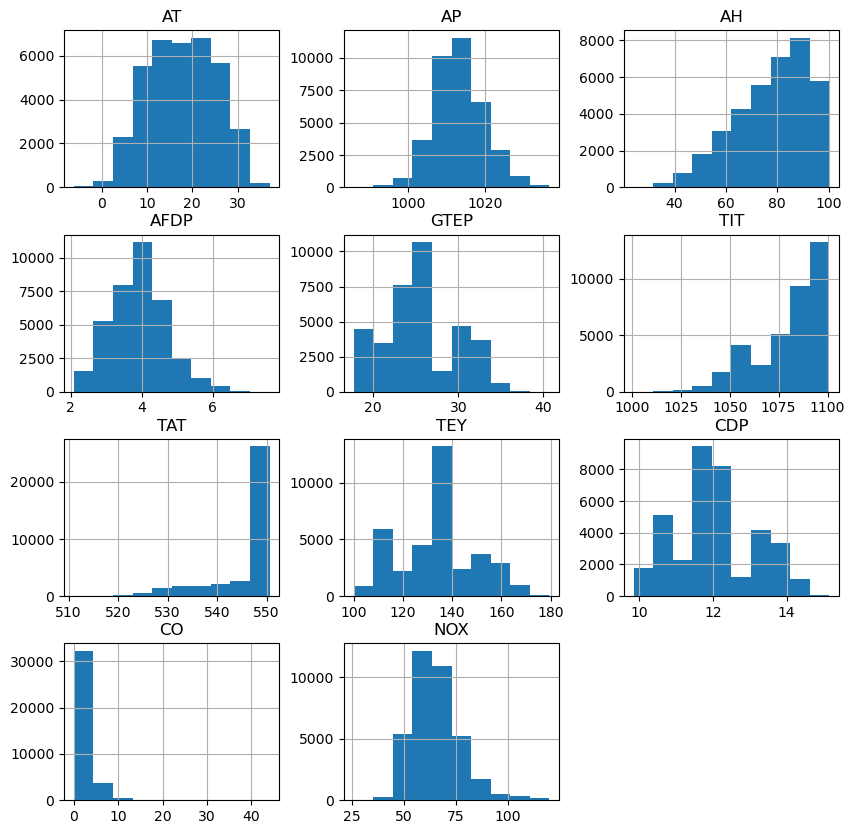

In [5]:
print("Skewness:\n",df.skew())
df.hist(figsize=(10,10))
plt.show()

Not all the features in dataset are uniformly distributed,Also we can see variables such as AH,TIT,TAT are negative skewed(tail to left).

Kurtosis:
 AT      -0.826600
AP       0.441993
AH      -0.274590
AFDP     0.224626
GTEP    -0.653853
TIT     -0.045755
TAT      2.016792
TEY     -0.500196
CDP     -0.631588
CO      49.081705
NOX      2.037591
dtype: float64


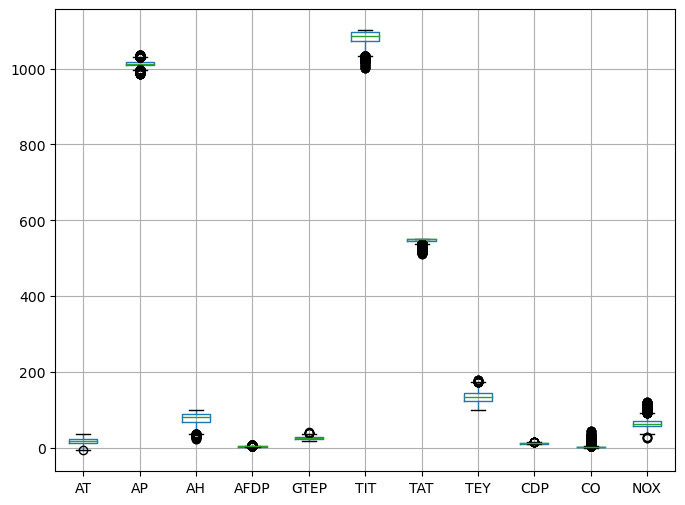

In [6]:
print("Kurtosis:\n",df.kurt())
df.boxplot(figsize=(8,6))
plt.show()

As we can see there are outliers in multiple variables,Some have large amount of outliers/ high kurtosis.

In [7]:
cols=df.columns
cols

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

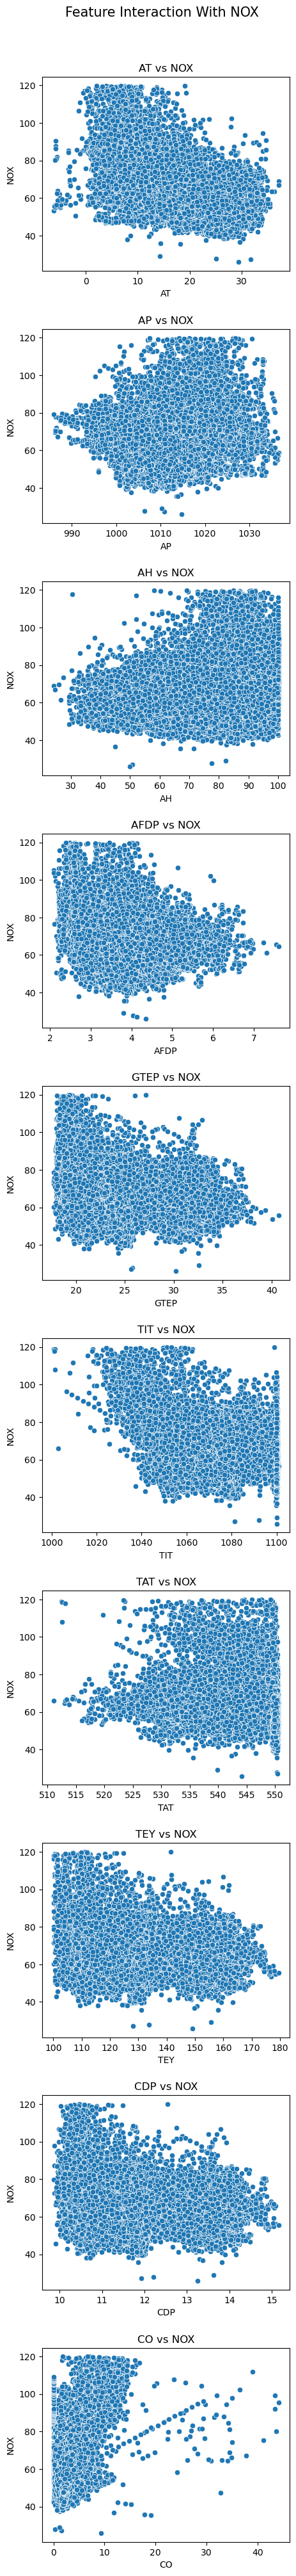

In [8]:
fig, axes = plt.subplots(10,1, figsize=(5,50))
for i, col in enumerate(cols[:-1]):
    sns.scatterplot(x=col,y='NOX', data=df, ax=axes[i])
    axes[i].set_ylabel("NOX")
    axes[i].set_title(f"{col} vs NOX")
fig.text(0.5,0.9,"Feature Interaction With NOX",va="center",ha="center",fontsize=15)
    
plt.subplots_adjust(hspace=0.3)
plt.show()

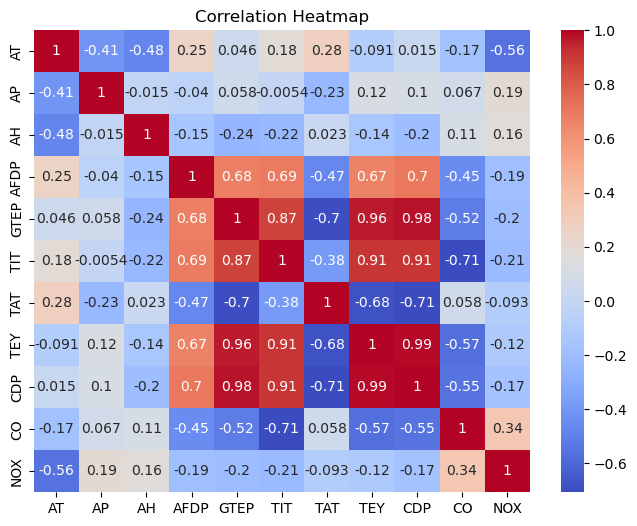

In [9]:
correlation_matrix=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

The heatmap above shows the correlation between features and output variables(CO and NOx). It is easy to see that some features are negatively correlated each other. For example, the correlation between TIT and CO is -0.71.

In [11]:
#Data Peparation

nox_df = df.copy()
nox_df = nox_df.drop("CO", axis = 1) # drop the target variable CO

In [13]:
from sklearn.model_selection import train_test_split
X = nox_df.iloc[:, 0:-1]
y = nox_df["NOX"]
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2,random_state= 0, shuffle = True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(29386, 9) (29386,)
(7347, 9) (7347,)


In [15]:
from sklearn.preprocessing import StandardScaler

std_scaler= StandardScaler()

X_train_transformed= pd.DataFrame(std_scaler.fit_transform(X_train),
                                     columns=std_scaler.get_feature_names_out(),
                                     index=X_train.index)

X_train_transformed.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
20284,1.058962,-0.194113,0.398850,1.616353,0.055897,0.593648,0.534720,-0.015856,0.128094
16136,-1.286820,0.579928,0.336599,-1.158206,-0.448449,0.170710,0.556730,0.048991,-0.275443
31654,0.289989,0.254831,-1.866631,-0.591162,0.511697,0.256441,0.506840,0.169696,0.198114
24789,0.537811,-1.277771,-1.159765,0.994596,1.560564,1.062310,-1.036815,1.434534,1.371875
35516,-0.683846,2.112531,-0.723596,-1.652171,-1.572885,-1.886830,0.489232,-1.524673,-1.595693


In [16]:
X_test_transformed= pd.DataFrame(std_scaler.transform(X_test),
                                     columns=std_scaler.get_feature_names_out(),
                                     index=X_test.index)

X_test_transformed.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
26322,1.115212,-0.441806,0.042066,0.086601,-0.180852,-0.263660,0.536187,-0.426768,-0.309532
28519,-0.745868,0.425120,-0.907999,-1.759139,-0.913337,-0.972368,0.572871,-0.692577,-0.830999
32560,0.975594,-1.076520,-2.767020,0.437899,1.268814,1.062310,-0.617152,1.241919,1.267766
20398,1.894118,-0.565653,-1.617491,2.989340,1.222899,1.068026,-1.082303,0.955565,1.121276
13025,1.241942,0.518005,-0.354790,0.236899,-0.490299,-0.195075,0.448146,-0.672031,-0.508537


In [18]:
%%time

from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 5.874661034867608

CPU times: total: 78.1 ms
Wall time: 6.78 s


# Linear Regression

       Actual  Linear Regression Predictions
26322  48.876                      52.790270
28519  68.584                      69.579278
32560  55.400                      55.300796
20398  52.136                      54.206647
13025  57.123                      61.640542
...       ...                            ...
36482  50.570                      69.072728
2109   99.843                      82.652098
18315  67.334                      68.494256
11132  63.039                      59.775853
33083  47.762                      52.642581

[7347 rows x 2 columns]


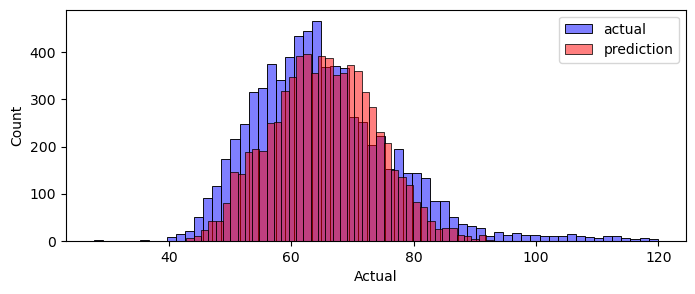

In [20]:
output_df = pd.DataFrame({'Actual': y_test})
output_df['Linear Regression Predictions'] = y_test_pred

print(output_df)

fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Linear Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

# KNN Regression

In [21]:
%%time

from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 2.679989655641758

CPU times: total: 93.8 ms
Wall time: 2.58 s


       Actual  Linear Regression Predictions  KNN Regression Predictions
26322  48.876                        47.4396                     47.4396
28519  68.584                        68.7460                     68.7460
32560  55.400                        54.2044                     54.2044
20398  52.136                        54.5158                     54.5158
13025  57.123                        52.8310                     52.8310
...       ...                            ...                         ...
36482  50.570                        49.7344                     49.7344
2109   99.843                        97.8416                     97.8416
18315  67.334                        67.6492                     67.6492
11132  63.039                        65.3088                     65.3088
33083  47.762                        50.4222                     50.4222

[7347 rows x 3 columns]


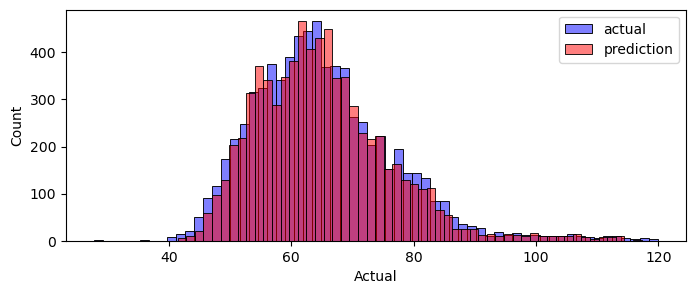

In [25]:
output_df['KNN Regression Predictions'] = y_test_pred

print(output_df)

fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['KNN Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

# Decision Tree 

In [26]:
%%time

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 3.5966433918606233

CPU times: total: 359 ms
Wall time: 3.3 s


       Actual  Linear Regression Predictions  KNN Regression Predictions  \
26322  48.876                        47.4396                     47.4396   
28519  68.584                        68.7460                     68.7460   
32560  55.400                        54.2044                     54.2044   
20398  52.136                        54.5158                     54.5158   
13025  57.123                        52.8310                     52.8310   
...       ...                            ...                         ...   
36482  50.570                        49.7344                     49.7344   
2109   99.843                        97.8416                     97.8416   
18315  67.334                        67.6492                     67.6492   
11132  63.039                        65.3088                     65.3088   
33083  47.762                        50.4222                     50.4222   

       DT Regression Predictions  
26322                     52.186  
28519            

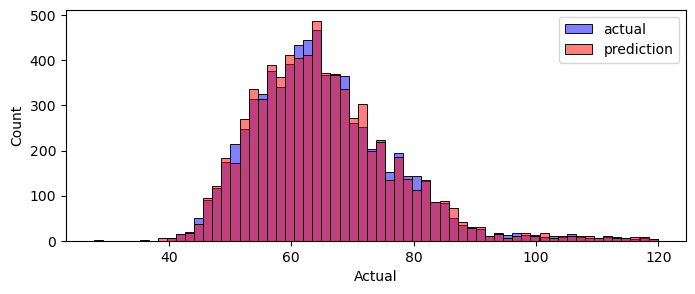

In [28]:
output_df['DT Regression Predictions'] = y_test_pred

print(output_df)

fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['DT Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

# Random Forest

In [29]:
%%time

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 2.6011582768476926

CPU times: total: 27.1 s
Wall time: 1min 20s


In [30]:
output_df['RF Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions,RF Regression Predictions
26322,48.876,47.4396,47.4396,52.186,50.79409
28519,68.584,68.7460,68.7460,68.364,69.68314
32560,55.400,54.2044,54.2044,54.655,55.30114
20398,52.136,54.5158,54.5158,54.546,54.45588
13025,57.123,52.8310,52.8310,59.687,53.99260
...,...,...,...,...,...
36482,50.570,49.7344,49.7344,50.717,55.66244
2109,99.843,97.8416,97.8416,107.560,103.23881
18315,67.334,67.6492,67.6492,62.262,63.78847
11132,63.039,65.3088,65.3088,66.487,64.48968


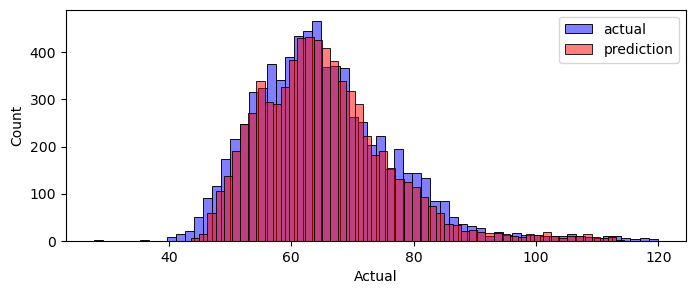

In [31]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['RF Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

# Conclusion

Looks like the Random forest works well on this dataset and is also better than the simple linear regression model. I just applied the random forest model with default parameters, and I'm amazed that a simple random forest model can fit the data so well. Random Forest has low MAE(Mean Absolute Error).